# Polynomial Interpolation – Exercise sheet 2

TMA4130/TMA4135 Høst 2023

## Lagrange interpolation

Remember how we can implement the cardinal functions and do the Lagrange interpolation:

In [115]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# Functions
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(x.shape)
        for j in range(n):      # Loop to make the product for l_i
            if i == j:
                continue

            li *= np.divide(x - xdata[j], xdata[i] - xdata[j])
        l.append(li)
    return l


def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by `cardinal(xdata, x)`
    Return: An array with the interpolation polynomial (evaluated at `x`). 
    """
    poly = 0
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]
    return poly


def L(
    x: np.ndarray,
    xdata: np.ndarray,
    y_func: 'function'
) -> np.ndarray:
    cardinal_functions = cardinal(xdata=xdata, x=x)
    y = np.array([y_func(x_point) for x_point in list(xdata)])
    lagrange_functions = lagrange(ydata=y, l=cardinal_functions)

    return lagrange_functions


def plot(x: np.ndarray, y: np.ndarray, y_correct: np.ndarray, label1: str, label2: str, title: str) -> None:
    plt.plot(x, y, label=label1)
    plt.plot(x, y_correct, label=label2)
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

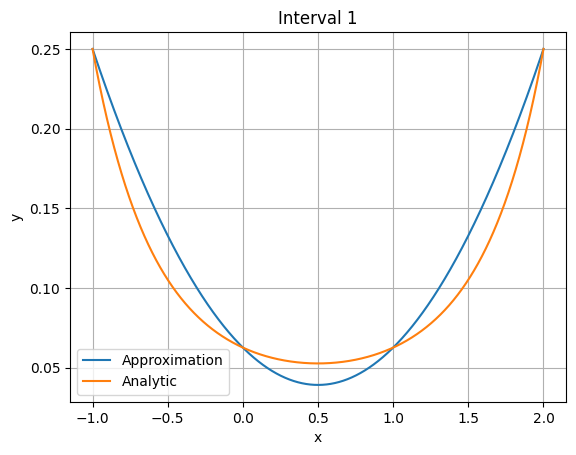

Max error for Interval 1: 0.0317
Max error for Interval 2: 67108861.125


In [117]:
# Problem 1c
x1 = np.linspace(-1, 2, 10000)
x2 = np.linspace(-5, 5, 10000)

x_points = np.linspace(-1, 2, 4)


def y_func(x): return np.power(2, np.power(x, 2) - 4 - x)


y1 = L(x=x1, xdata=x_points, y_func=y_func)
y_correct_1 = np.array([y_func(x) for x in list(x1)])
y2 = L(x=x2, xdata=x_points, y_func=y_func)
y_correct_2 = np.array([y_func(x) for x in list(x2)])

err1 = np.abs(y_correct_1 - y1)
err2 = np.abs(y_correct_2 - y2)

title1 = "Interval 1"
title2 = "Interval 2"
label1 = "Approximation"
label2 = "Analytic"


plot(
    x=x1,
    y=y1,
    y_correct=y_correct_1,
    title=title1,
    label1=label1,
    label2=label2
)
print(f"Max error for {title1}: {round(np.max(err1), 4)}")
print(f"Max error for {title2}: {round(np.max(err2), 4)}")

In [118]:
# Problem 2d
def reference_interval(n: int) -> np.ndarray:
    k = np.arange(n)
    # interval = np.linspace(-1, 1, 1000)

    return np.cos(np.multiply(np.divide(np.pi, 2), np.divide(np.multiply(2, k) + 1, n)))

def general_interval(a: float, b: float, n: int) -> np.ndarray:
    ref_interval = reference_interval(n)
    return np.multiply(np.divide(a + b, 2) + np.divide(b - a, 2), ref_interval)

In [119]:
a = -1
b = 2
n = 3 

chebyshev_nodes = general_interval(a, b, n)
print(f"Chebyshev nodes on the interval [{a}, {b}] for n={n} is {', '.join([str(round(node, 2)) for node in chebyshev_nodes])}")

Chebyshev nodes on the interval [-1, 2] for n=3 is 1.73, 0.0, -1.73


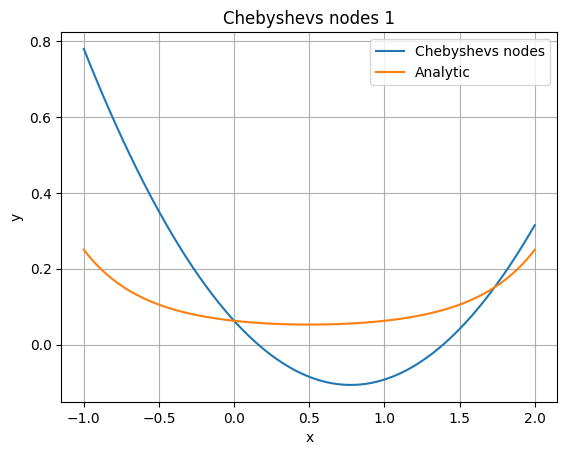

In [120]:
# Problem 1e
c = -5
d = 5
cheb1 = general_interval(a=a, b=b, n=n)
cheb2 = general_interval(a=c, b=d, n=n)

y1 = L(x=x1, xdata=cheb1, y_func=y_func)
y_correct_1 = np.array([y_func(x) for x in list(x1)])
y2 = L(x=x2, xdata=cheb2, y_func=y_func)
y_correct_2 = np.array([y_func(x) for x in list(x2)])

cheb_err1 = np.abs(y_correct_1 - y1)
cheb_err2 = np.abs(y_correct_2 - y2)

label1 = "Chebyshevs nodes"
label2 = "Analytic"

plot(
    x=x1,
    y=y1,
    y_correct=y_correct_1,
    title="Chebyshevs nodes 1",
    label1=label1, label2=label2
)

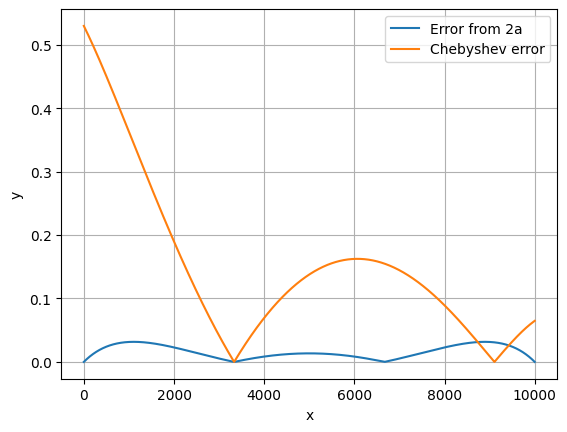

In [121]:
# Problem 2f
plt.plot(err1, label="Error from 2a")
plt.plot(cheb_err1, label="Chebyshev error")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()
# I can see that this plot does not give a correct approximation

### a) Interpolating $x(t)$

In [122]:
# Interpolation data
tdata = 
xdata = 
    
# Grid points for plotting
t = np.linspace(0,tdata[-1],100)

# Do the interpolation for the x coordinates here
# the final polynomial should be called
px = 

# and plot it here ...

SyntaxError: invalid syntax (2081008248.py, line 2)

### b) Interpolating $y(t)$

In [ ]:
# Now do the same for the y coordinate...
y_points = 

# the final polynomial should be called
py = 

# and plot it here ...

#Hint: you can re-use the "li" already computed, since the cardinal functions depend only on tdata, not on xdata!

### c) Trajectory

The trajectory of a particle moving in $\mathbb{R}^2$ is the locus of all $(x,y)$ points traveled by the particle. Therefore, all we have to do is plot the interpolation of $x$ against the interpolation of $y$.

In [ ]:

# If your polynomial in x is called px, Create your plot here
plt.plot(px, py, xdata, y_points,'ob')
plt.legend(['Interpolated trajectory', 'Data'])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid(True)

### d) Find the exact values and compare

In [ ]:
# Compute the exact values

xdata_exact =
ydata_exact =

# Plot here both trajectories